# Introduction

**Aim of the project:**<br> This is an analysis of the Boston Housing Dataset. In it I will describe the dataset using descriptive statistics, conduct some inferential statistical analysis to determine whether there is a significnat difference in house prices between houses along the Charles river and those that are not. Finally I will create a neural network using keras to predict the median house price based on the other variables in the dataset.

**Background - what is the Boston Housing Dataset?:**<br>
The Boston Housing Dataset was originally published by Harrisson & Rubenfeld in 1978, in order to determine whether or not clean air had an impact on house prices in Boston. The attributes of the dataset are described as follows:<br>
Number of Instances: 506 <br>
Number of Attributes: 13 numeric/categorical predictive. <br>Median Value (attribute 14) is usually the target.<br>
<b>Attribute Information (in order):</b><br>
<b>CRIM</b>     per capita crime rate by town<br>
<b>ZN</b>      proportion of residential land zoned for lots over 25,000 sq.ft.<br>
<b>INDUS</b>    proportion of non-retail business acres per town<br>
<b>CHAS</b>     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
<b>NOX</b>      nitric oxides concentration (parts per 10 million)<br>
<b>RM</b>       average number of rooms per dwelling<br>
<b>AGE</b>      proportion of owner-occupied units built prior to 1940<br>
<b>DIS</b>      weighted distances to five Boston employment centres<br>
<b>RAD</b>      index of accessibility to radial highways<br>
<b>TAX</b>      full-value property-tax rate per 10000 <br>
<b>PTRATIO</b>  pupil-teacher ratio by town<br>
<b>B</b>        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
<b>LSTAT</b>    percentage lower status of the population<br>
<b>MEDV</b>     Median value of owner-occupied homes in $1000's<br>


## Part 1 - Describe

### Preliminary investigations:


In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as st
%matplotlib inline

In [2]:
#import Boston House Prices dataset from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
from sklearn.datasets import load_boston

In [3]:
#Assign variable 'boston' to the dataset
boston = load_boston()

In [4]:
#take a look at the dataset
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
#We'll create a pandas dataframe from this data to make it look better
#create pandas dataframe
df = pd.DataFrame(boston.data, columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'b', 'ptratio', 'lstat'])

In [6]:
#We need to add the median value to the dataframe
df['MEDV'] = boston.target

In [7]:
#drop racial profiling column
#df = df.drop(columns="b")

We can visualise the relationship between each variable and the target variable using the pairplot function:

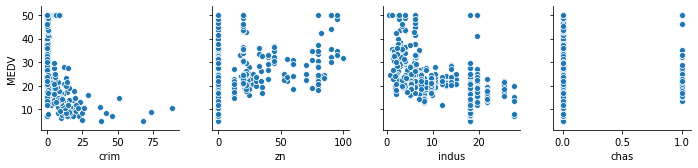

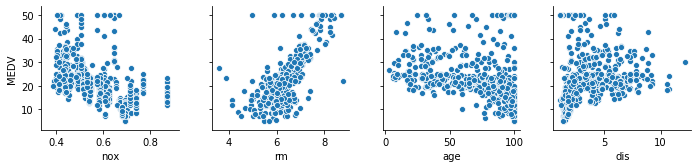

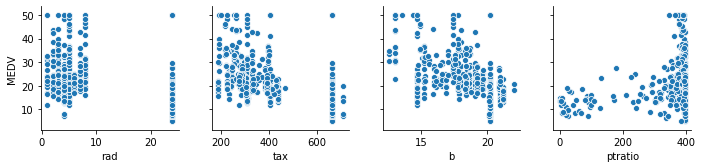

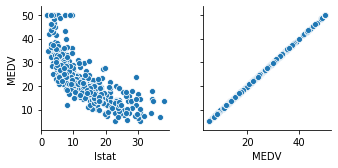

In [8]:
#visualise the relationship between each variable and the target variable using pairplot function
#code adapted from https://dataoutpost.wordpress.com/2018/04/03/eda-part-1-full-python-code/
for i in range(0, len(df.columns), 4):
    sns.pairplot(data=df,
    x_vars=df.columns[i:i+4],
    y_vars=['MEDV'])

We can see from this that the variable RM (no. of rooms) has a linear relationship with the price variable MEDV, which we would expect. We can also see that the variable LSTAT (% lower status of the population) appears to have a negative linear relationship with the price variable.<br> The 'MEDV' variable is our target variable, as it reflects the price of the property. Plotting this variable shows a normal distribution with some outliers:

<function matplotlib.pyplot.show(*args, **kw)>

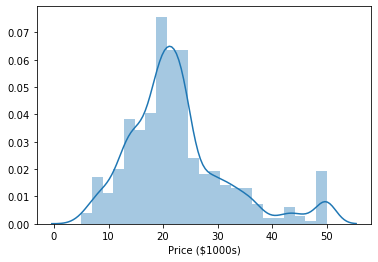

In [9]:
#plot medv values
sns.distplot(df['MEDV'])
plt.xlabel('Price ($1000s)')
plt.show

We can see from this plot that there is a disproportionate number of 'medv' values of 50. This is likely because when the data was being collected the values were in bands, with the highest being 50,000 and above. We will remove these as they skew the data.

In [10]:
#remove MEDV values of 50
df = df[df.MEDV !=50]

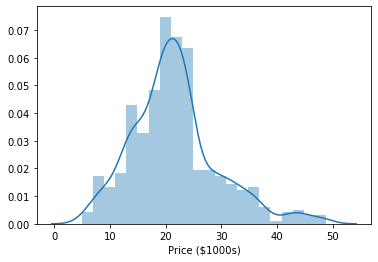

In [11]:
#plot medv values without the 50 values
sns.distplot(df['MEDV'])
plt.xlabel('Price ($1000s)')
plt.show()

In [12]:
#We'll take a look at the first 5 rows
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,b,ptratio,lstat,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
#check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
b          0
ptratio    0
lstat      0
MEDV       0
dtype: int64

No null values found.

Next we'll look at correlations between the variables. A correlation $<=0.25$ or $>=-0.25$ is a weak correlation and should not help us with predictions. 

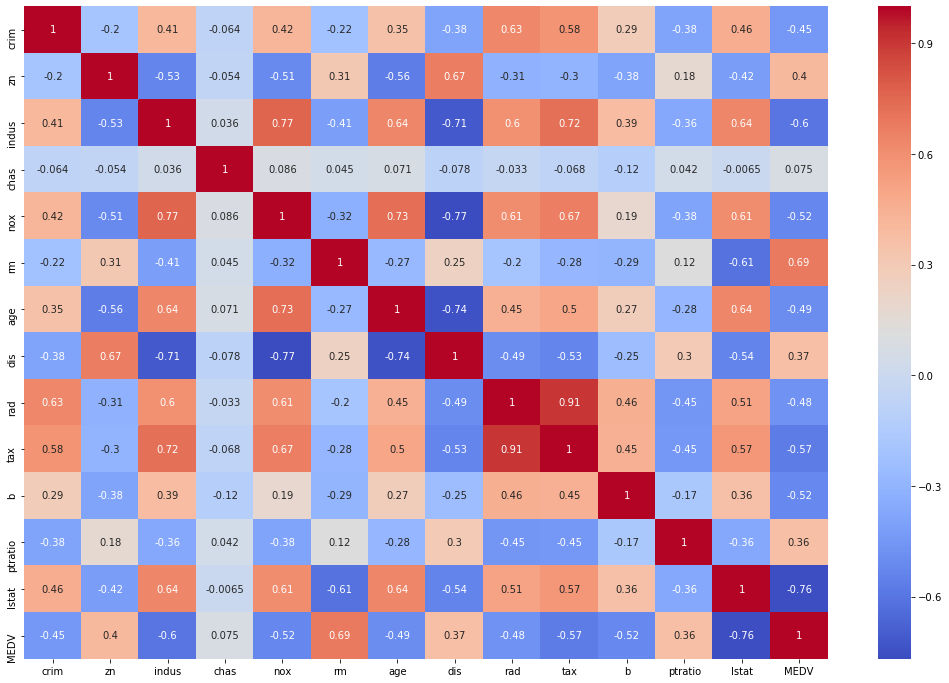

In [14]:
#show correlation between variables
ax, fig = plt.subplots(figsize = (18,12))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()
#blues show a negative correlation, oranges/reds a positive one

From the plot above we can see that the variable with the strongest positive correlation is no. of rooms, and the one with the strongest negative correlation is % of lower status of population. Intuitively it is reasonable that houses with more rooms would cost more, likewise it is a fair assumption that areas with a higher proportion of lower socio-economic residents would have lower prices housing on average. From this there doesn't appear to be a strong correlation between the 'CHAS' variable and house prices.<br>
Finally in this section we'll take a look at the prices variable:

In [15]:
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)
prices.describe()

#look at statistics of the price variable
#code adapted from https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-
#regression-b4e47493633d
minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

#Show the calculated statistics

print("Statistics for Boston housing dataset price variable:\n")
print("Minimum: ${}".format(minimum_price)) 
print("Maximum: ${}".format(maximum_price))
print("Mean: ${}".format(mean_price))
print("Median: ${}".format(median_price))
print("Standard deviation: ${}".format(std_price))

Statistics for Boston housing dataset price variable:

Minimum: $5.0
Maximum: $48.8
Mean: $21.635918367346957
Median: $20.9
Standard deviation: $7.857271146580542


### Part 2 - Inferential Statistics

The aim of this section is to determine whether there is a significant difference in median prices of houses that are along the Charles river and those that are not. The Null Hypothesis will be that there is no difference between median house prices whether or not they are along the Charles River. Lets take a look at the variable 'chas' which is the indicator as to whether the house lies along the river or not. '1' means it does, '0' means it does not.

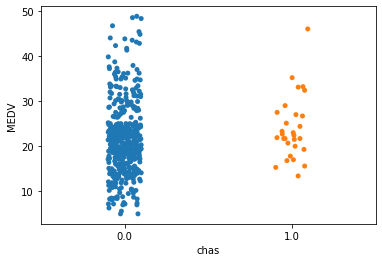

In [16]:
sns.stripplot(x="chas", y = 'MEDV', data = df)

From observing the scatterplot above we can see that there are much fewer properties bordering the Charles river than properties that don't border it; it also looks like the highest priced properties are away from the river.

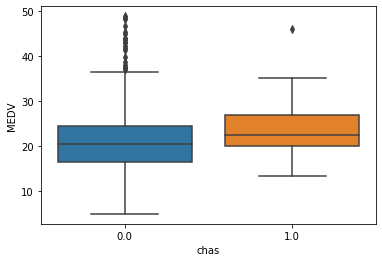

In [17]:
sns.boxplot(x = "chas", y = "MEDV", data = df)

From the boxplot above we can see that there are a lot of outliers in the properties not bordering the river, and the median price of houses bordering the river appears greater than that of houses not bordering it.
Our null hypothesis is that there is statistically a difference between the median prices of houses that border the Charles River and those that dont'. Our alternative hypothesis is that there is statistically no significant difference between the median prices of houses that border the Charles river and those that don't. Lets seperate the variable into its components

In [33]:
#for col in df.columns:
    #print(col)
charles = df.drop(['crim','rm','dis','zn','indus','nox','age','rad','tax', 'b','ptratio','lstat'], axis =1)


In [34]:
#group data in chas variable by 1 or 0, either bordering the river or not
group = charles.groupby('chas')
#look at this dataframe
group.describe().head()
#isolate medv


MEDV                                                   
      count       mean       std   min   25%   50%   75%   max
chas                                                          
0.0   461.0  21.488503  7.898848   5.0  16.5  20.6  24.5  48.8
1.0    29.0  23.979310  7.024161  13.4  20.0  22.4  27.0  46.0

In [35]:
notbound = charles[(charles['chas'] ==0.0)]
bound = charles[(charles['chas'] == 1.0)]
#notbound.reset_index(inplace= True)
#bound.reset_index(inplace= True)
print(bound)



     chas  MEDV
142   1.0  13.4
152   1.0  15.3
154   1.0  17.0
155   1.0  15.6
160   1.0  27.0
208   1.0  24.4
209   1.0  20.0
210   1.0  21.7
211   1.0  19.3
212   1.0  22.4
216   1.0  23.3
218   1.0  21.5
219   1.0  23.0
220   1.0  26.7
221   1.0  21.7
222   1.0  27.5
234   1.0  29.0
236   1.0  25.1
269   1.0  20.7
273   1.0  35.2
274   1.0  32.4
276   1.0  33.2
277   1.0  33.1
282   1.0  46.0
356   1.0  17.8
357   1.0  21.7
358   1.0  22.7
363   1.0  16.8
364   1.0  21.9


We saw from the boxplots earlier that there are a lot of outliers in the values of houses not bordering the river. We can use the 3 times standard deviation method to cap these outliers

In [21]:
bench2 = notbound['MEDV'].mean() + 3*(notbound['MEDV'].std())
bench2

45.18504774620857

Perform the Levene test for equal variances. The Levene test tests the null hypothesis that all input samples are from populations with equal variances. If the p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances. Thus, the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population.

In [22]:
from scipy import stats
stats.levene(notbound['MEDV'], bound['MEDV'])

LeveneResult(statistic=0.6887118673011111, pvalue=0.40700864732277753)

The Pvalue is not significant meaning there is homogeneity of variances and we can proceed. Next we check the assumption of normality - the residuals should be normally distributed: 

In [42]:
stats.shapiro(bound['MEDV'])

(0.9188438653945923, 0.028505902737379074)

In [43]:
stats.shapiro(notbound['MEDV'])

(0.9592850804328918, 5.540209957466402e-10)

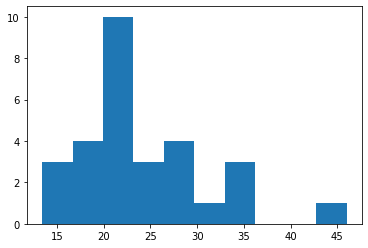

In [47]:
plt.hist(bound['MEDV'])

plt.show()

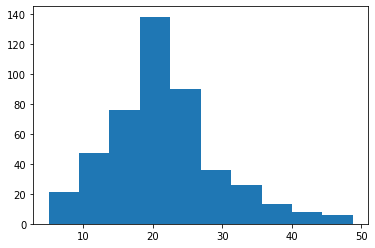

In [49]:
plt.hist(notbound['MEDV'])
plt.show()

The properties not bounding the Charles river are normally distributed, but those bounding the river don't appear to be. However there are a lot fewer data points bounding the river so it is more difficult to make an assumption about normality. It the data isn't normally distributed a non-parametric test should be used. <br> Running an independent t-test gives us the following:

In [52]:
stats.ttest_ind(bound['MEDV'],notbound['MEDV'] )

Ttest_indResult(statistic=1.6571053443179937, pvalue=0.09814089320087695)

#### Interpretation:

To determine if there is a significant difference between the groups we need to set a p-value threshold. If the test produces a p-value which is less than the threshold p-value then the test is said to be significant and that there is a significant difference between the two means. This means one rejects the null hypothesis in support of the alternative. Most commonly the p-value is set to 0.05 , so that's what we'll set it as. The result of the independent t-test is a p value of 0.098. As this is greater that the threshold set we reject the null hypothese that there is a difference in the means of the properties that border the Charles river and those that don't.

### Part 3 - Predict

The aim of this section is to use keras to create a neural network that can predict the median house price based on some or all of the other variables in the dataset. 

In [24]:
import tensorflow as tf
import keras as kr
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec
# For preprocessing data.
import sklearn.preprocessing as pre
#split dataframe into target & other variables
x = df.drop('MEDV', axis = 1)
y = df['MEDV']
x



Using TensorFlow backend.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,b,ptratio,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [25]:
y


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 490, dtype: float64

In [26]:
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2)

In [27]:
x.shape


(490, 13)

In [28]:
y.shape

(490,)

Building & training:

In [53]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(26, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(26, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [54]:
m.fit(x_train, y_train, epochs=300, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
392/392 [==============================] - 0s 445us/step - loss: 52.1223
Epoch 2/300
392/392 [==============================] - 0s 94us/step - loss: 42.6162
Epoch 3/300
392/392 [==============================] - 0s 97us/step - loss: 40.7665
Epoch 4/300
392/392 [==============================] - 0s 89us/step - loss: 38.7238
Epoch 5/300
392/392 [==============================] - 0s 125us/step - loss: 35.6006
Epoch 6/300
392/392 [==============================] - 0s 89us/step - loss: 36.2820
Epoch 7/300
392/392 [==============================] - 0s 89us/step - loss: 31.9123
Epoch 8/300
392/392 [==============================] - 0s 89us/step - loss: 32.7244
Epoch 9/300
392/392 [==============================] - 0s 92us/step - loss: 32.5758
Epoch 10/300
392/392 [==============================] - 0s 97us/step - loss: 29.9087
Epoch 11/300
392/392 [==============================] - 0s 92us/step - loss: 29.1124
Epoch 12/300
392/392 [==

392/392 [==============================] - 0s 81us/step - loss: 16.6960
Epoch 94/300
392/392 [==============================] - 0s 87us/step - loss: 16.8633
Epoch 95/300
392/392 [==============================] - 0s 122us/step - loss: 17.3806
Epoch 96/300
392/392 [==============================] - 0s 84us/step - loss: 16.1779
Epoch 97/300
392/392 [==============================] - 0s 76us/step - loss: 17.2153
Epoch 98/300
392/392 [==============================] - 0s 79us/step - loss: 15.2830
Epoch 99/300
392/392 [==============================] - 0s 81us/step - loss: 15.1287
Epoch 100/300
392/392 [==============================] - 0s 89us/step - loss: 16.1797
Epoch 101/300
392/392 [==============================] - 0s 84us/step - loss: 17.5899
Epoch 102/300
392/392 [==============================] - 0s 76us/step - loss: 15.5133
Epoch 103/300
392/392 [==============================] - 0s 79us/step - loss: 15.7556
Epoch 104/300
392/392 [==============================] - 0s 81us/step - l

392/392 [==============================] - 0s 191us/step - loss: 14.7875
Epoch 188/300
392/392 [==============================] - 0s 201us/step - loss: 13.2928
Epoch 189/300
392/392 [==============================] - 0s 186us/step - loss: 12.9946
Epoch 190/300
392/392 [==============================] - 0s 188us/step - loss: 13.2336
Epoch 191/300
392/392 [==============================] - 0s 188us/step - loss: 13.4423
Epoch 192/300
392/392 [==============================] - 0s 183us/step - loss: 13.7794
Epoch 193/300
392/392 [==============================] - 0s 219us/step - loss: 13.7976
Epoch 194/300
392/392 [==============================] - 0s 193us/step - loss: 15.5105
Epoch 195/300
392/392 [==============================] - 0s 198us/step - loss: 13.0447
Epoch 196/300
392/392 [==============================] - 0s 196us/step - loss: 13.8832
Epoch 197/300
392/392 [==============================] - 0s 201us/step - loss: 15.6252
Epoch 198/300
392/392 [==============================] - 

392/392 [==============================] - 0s 201us/step - loss: 11.1653
Epoch 282/300
392/392 [==============================] - 0s 193us/step - loss: 10.7053
Epoch 283/300
392/392 [==============================] - 0s 191us/step - loss: 10.6949
Epoch 284/300
392/392 [==============================] - 0s 206us/step - loss: 10.4165
Epoch 285/300
392/392 [==============================] - 0s 234us/step - loss: 11.4099
Epoch 286/300
392/392 [==============================] - 0s 198us/step - loss: 12.0766
Epoch 287/300
392/392 [==============================] - 0s 196us/step - loss: 11.5369
Epoch 288/300
392/392 [==============================] - 0s 193us/step - loss: 10.7969
Epoch 289/300
392/392 [==============================] - 0s 188us/step - loss: 10.0587
Epoch 290/300
392/392 [==============================] - 0s 181us/step - loss: 10.9101
Epoch 291/300
392/392 [==============================] - 0s 186us/step - loss: 11.3080
Epoch 292/300
392/392 [==============================] - 

In [55]:
m.predict(x_test).round().T

array([[24., 27., 24., 16., 26., 38., 32., 22., 32., 16., 23., 19., 15.,
        18., 24., 22., 16., 27., 12., 28., 32., 18.,  6., 15., 21.,  8.,
        20., 10., 21., 21., 23., 12., 18., 13., 13., 24., 13., 29., 20.,
         9., 23., 18., 11., 30.,  6., 12., 10., 18.,  7., 19., 27., 29.,
        21., 14., 11., 19., 22., 21., 15., 10., 11., 35., 30., 19., 17.,
        20., 21., 29., 18., 20.,  9., 26., 18., 17., 15., 17., 30., 16.,
        17., 12., 19., 20., 18., 20., 34., 21., 22., 19., 15., 16., 10.,
        30., 31., 23., 31., 18., 24., 18.]], dtype=float32)

In [56]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([29.6, 24.4, 41.3, 15.6, 22.1, 35.4, 44.8, 22.6, 34.9, 20. , 25.3,
       22. , 17.8, 19.4, 24.7, 22.9, 17.5, 34.7, 18.6, 24.1, 33.1, 18.9,
        8.5, 19.9, 23.8,  8.1, 23. ,  7.2, 20.7, 25. , 19.4, 10.2, 18.7,
       15.1, 14.6, 23.2, 23.8, 24. , 23.1,  8.3, 23. , 18.5, 10.9, 29.4,
        5. , 11.7,  7. , 17.4, 10.2, 19.6, 22.5, 36.2, 21.2, 19.1, 13.9,
       20. , 23.3, 21.1, 19.4, 12.8, 11.5, 44. , 42.8, 24.5, 20.4, 19.4,
       21.4, 34.6, 16.1, 18.9, 10.5, 22.8, 16.8, 18.2, 19.7, 22.4, 43.8,
       17.8, 19.3, 12.1, 18.8, 20.9, 17.5, 19. , 34.9, 28.7, 20.9, 19.3,
       17.4, 16.6, 20.2, 29. , 33.4, 24.5, 34.9, 21.4, 24. , 22.5],
      dtype=float32)

In [57]:
m.evaluate(x_test, y_test)

98/98 [==============================] - 0s 702us/step


20.00065922250553

It is good practice to normalise the data, as the values all have different ranges. For each feature we subtract the mean and divide by the standard deviation of the feature so that the feature is centered around zero. We can do this with keras: 

In [58]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)
print(x_test_scaled)

[[-0.38818846 -0.45831293 -1.26096505 ... -0.30509792  0.26155371
   0.09086341]
 [-0.38226742  0.33313495 -0.61735492 ...  0.08383992  0.36614529
  -0.71932641]
 [-0.26096104 -0.45831293  1.18761393 ... -1.81223206 -0.0539531
  -1.18869837]
 ...
 [ 0.46270526 -0.45831293  0.97593771 ...  0.8617156   0.3919934
   0.10132711]
 [-0.35865655 -0.45831293 -0.72605352 ... -0.49956684  0.12351948
  -0.24845963]
 [-0.38912808 -0.45831293 -0.97062537 ...  0.03522269  0.37986877
   0.04751377]]


In [64]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(26, input_dim=13, activation="relu"))
#added an extra layer here to see if it improves the result
m.add(kr.layers.Dense(26, activation="tanh"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam", metrics = ["accuracy"])

In [65]:
m.fit(x_train_scaled, y_train, epochs=300, batch_size=10)

Epoch 1/300
392/392 [==============================] - 0s 374us/step - loss: 458.7406 - accuracy: 0.0000e+00
Epoch 2/300
392/392 [==============================] - 0s 99us/step - loss: 358.9862 - accuracy: 0.0000e+00
Epoch 3/300
392/392 [==============================] - 0s 99us/step - loss: 277.6059 - accuracy: 0.0000e+00
Epoch 4/300
392/392 [==============================] - 0s 104us/step - loss: 220.2763 - accuracy: 0.0000e+00
Epoch 5/300
392/392 [==============================] - 0s 97us/step - loss: 181.1573 - accuracy: 0.0026
Epoch 6/300
392/392 [==============================] - 0s 97us/step - loss: 153.4893 - accuracy: 0.0051
Epoch 7/300
392/392 [==============================] - 0s 94us/step - loss: 132.5875 - accuracy: 0.0026
Epoch 8/300
392/392 [==============================] - 0s 92us/step - loss: 116.6150 - accuracy: 0.0026
Epoch 9/300
392/392 [==============================] - 0s 99us/step - loss: 103.9943 - accuracy: 0.0051
Epoch 10/300
392/392 [========================

392/392 [==============================] - 0s 249us/step - loss: 7.8279 - accuracy: 0.0281
Epoch 80/300
392/392 [==============================] - 0s 270us/step - loss: 7.6209 - accuracy: 0.0281
Epoch 81/300
392/392 [==============================] - 0s 120us/step - loss: 7.6835 - accuracy: 0.0281
Epoch 82/300
392/392 [==============================] - 0s 109us/step - loss: 7.4315 - accuracy: 0.0383
Epoch 83/300
392/392 [==============================] - 0s 114us/step - loss: 7.3282 - accuracy: 0.0306
Epoch 84/300
392/392 [==============================] - 0s 102us/step - loss: 7.2369 - accuracy: 0.0306
Epoch 85/300
392/392 [==============================] - 0s 112us/step - loss: 7.1854 - accuracy: 0.0281
Epoch 86/300
392/392 [==============================] - 0s 160us/step - loss: 7.0796 - accuracy: 0.0306
Epoch 87/300
392/392 [==============================] - 0s 130us/step - loss: 6.8388 - accuracy: 0.0357
Epoch 88/300
392/392 [==============================] - 0s 107us/step - loss:

392/392 [==============================] - 0s 97us/step - loss: 3.4426 - accuracy: 0.0281
Epoch 157/300
392/392 [==============================] - 0s 87us/step - loss: 3.3729 - accuracy: 0.0357
Epoch 158/300
392/392 [==============================] - 0s 84us/step - loss: 3.4640 - accuracy: 0.0179
Epoch 159/300
392/392 [==============================] - 0s 89us/step - loss: 3.4876 - accuracy: 0.0357
Epoch 160/300
392/392 [==============================] - 0s 109us/step - loss: 3.3213 - accuracy: 0.0255
Epoch 161/300
392/392 [==============================] - 0s 92us/step - loss: 3.2868 - accuracy: 0.0408
Epoch 162/300
392/392 [==============================] - 0s 89us/step - loss: 3.3658 - accuracy: 0.0485
Epoch 163/300
392/392 [==============================] - 0s 94us/step - loss: 3.3212 - accuracy: 0.0281
Epoch 164/300
392/392 [==============================] - 0s 92us/step - loss: 3.2853 - accuracy: 0.0383
Epoch 165/300
392/392 [==============================] - 0s 186us/step - loss

392/392 [==============================] - 0s 84us/step - loss: 2.1946 - accuracy: 0.0510
Epoch 235/300
392/392 [==============================] - 0s 84us/step - loss: 2.2632 - accuracy: 0.0459
Epoch 236/300
392/392 [==============================] - 0s 81us/step - loss: 2.3082 - accuracy: 0.0459
Epoch 237/300
392/392 [==============================] - 0s 94us/step - loss: 2.1652 - accuracy: 0.0459
Epoch 238/300
392/392 [==============================] - 0s 127us/step - loss: 2.1601 - accuracy: 0.0408
Epoch 239/300
392/392 [==============================] - 0s 209us/step - loss: 2.1607 - accuracy: 0.0485
Epoch 240/300
392/392 [==============================] - 0s 209us/step - loss: 2.2124 - accuracy: 0.0485
Epoch 241/300
392/392 [==============================] - 0s 204us/step - loss: 2.2114 - accuracy: 0.0408
Epoch 242/300
392/392 [==============================] - 0s 196us/step - loss: 2.1410 - accuracy: 0.0434
Epoch 243/300
392/392 [==============================] - 0s 196us/step - 

In [66]:
#x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[26., 29., 28., 16., 26., 37., 44., 25., 37., 19., 25., 22., 16.,
        16., 23., 27., 18., 32., 27., 25., 32., 20.,  9., 20., 22., 14.,
        22.,  9., 25., 21., 18., 14., 18., 15., 14., 22., 23., 23., 27.,
         9., 25., 19., 12., 33., 12., 14., 13., 21., 10., 18., 27., 35.,
        22., 15., 13., 22., 22., 22., 19., 13., 12., 43., 46., 24., 20.,
        20., 21., 33., 21., 21.,  7., 23., 22., 19., 15., 25., 45., 16.,
        20., 13., 19., 20., 16., 21., 38., 26., 20., 22., 16., 18., 18.,
        38., 35., 23., 33., 23., 23., 23.]], dtype=float32)

In [67]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([29.6, 24.4, 41.3, 15.6, 22.1, 35.4, 44.8, 22.6, 34.9, 20. , 25.3,
       22. , 17.8, 19.4, 24.7, 22.9, 17.5, 34.7, 18.6, 24.1, 33.1, 18.9,
        8.5, 19.9, 23.8,  8.1, 23. ,  7.2, 20.7, 25. , 19.4, 10.2, 18.7,
       15.1, 14.6, 23.2, 23.8, 24. , 23.1,  8.3, 23. , 18.5, 10.9, 29.4,
        5. , 11.7,  7. , 17.4, 10.2, 19.6, 22.5, 36.2, 21.2, 19.1, 13.9,
       20. , 23.3, 21.1, 19.4, 12.8, 11.5, 44. , 42.8, 24.5, 20.4, 19.4,
       21.4, 34.6, 16.1, 18.9, 10.5, 22.8, 16.8, 18.2, 19.7, 22.4, 43.8,
       17.8, 19.3, 12.1, 18.8, 20.9, 17.5, 19. , 34.9, 28.7, 20.9, 19.3,
       17.4, 16.6, 20.2, 29. , 33.4, 24.5, 34.9, 21.4, 24. , 22.5],
      dtype=float32)

In [68]:
m.evaluate(x_test_scaled, y_test)

98/98 [==============================] - 0s 448us/step


[8.692182167148104, 0.010204081423580647]

That is a better result. Changing the activation function to 'tahn' didn't improve the result. There's a slight improvement from adding a second layer. The next step is to try whitening the data, i.e. removing any underlying correlations. <br> Whitening:

In [70]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x_train)
pca.fit(x_test)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
x_train_white

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,b,ptratio,lstat
0,-0.106096,-0.325317,-0.099746,0.840434,-0.428635,0.269362,-0.742652,-1.031144,1.127264,-1.547557,0.441770,0.021121,0.236347
1,0.322041,3.861618,-0.660846,-0.889966,-0.353440,0.627010,0.948114,-0.298587,-1.626439,0.477837,-1.614782,-0.209459,3.361178
2,-0.732075,-0.110448,-1.245309,-0.826126,-0.277392,-0.959042,1.511162,-0.820459,2.620164,-1.199605,0.431832,-0.432230,0.338076
3,-0.447085,-0.167288,1.388552,0.809827,-0.044963,-0.051661,0.463754,0.369080,-1.265938,-0.392410,0.939633,-0.241063,-0.212418
4,-0.068989,-0.389142,-0.075467,0.874594,-0.467112,0.198822,-0.350760,-0.817392,0.113692,-1.578579,-0.889445,-0.158388,0.537346
5,-0.328845,-0.263621,2.373467,-1.646087,-0.123197,0.256689,0.107398,0.205333,1.013868,0.520583,-0.231711,-0.203508,0.705450
6,-0.441903,-0.211547,1.120392,1.314430,-0.017105,0.059998,-0.107857,0.264207,0.369413,1.757428,0.774190,0.054348,0.762653
7,0.351291,1.366245,-0.868045,-0.894440,-0.808800,1.200279,0.867691,-0.322935,2.206898,0.282787,-0.099280,-0.103117,0.115588
8,-0.414425,0.004878,2.429342,-1.146470,0.027165,0.057738,-0.351177,0.188143,3.377916,1.722900,-1.571045,-0.060986,1.636384
9,1.594320,-0.378205,-0.309648,-0.306741,0.526559,0.091216,-1.135208,0.835024,-0.249372,-0.049832,-0.425104,-0.199296,-1.462344


In [77]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(13, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(13,activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))


m.compile(loss="mean_squared_error", optimizer="adam", metrics = ["accuracy"])

In [79]:
history = m.fit(x_train_white, y_train, epochs=300, batch_size=10)

Epoch 1/300
392/392 [==============================] - 0s 216us/step - loss: 10.6576 - accuracy: 0.0153
Epoch 2/300
392/392 [==============================] - 0s 226us/step - loss: 10.4817 - accuracy: 0.0153
Epoch 3/300
392/392 [==============================] - 0s 211us/step - loss: 10.2768 - accuracy: 0.0128
Epoch 4/300
392/392 [==============================] - 0s 239us/step - loss: 10.1747 - accuracy: 0.0179
Epoch 5/300
392/392 [==============================] - 0s 219us/step - loss: 9.9683 - accuracy: 0.0153
Epoch 6/300
392/392 [==============================] - 0s 209us/step - loss: 9.8252 - accuracy: 0.0179
Epoch 7/300
392/392 [==============================] - 0s 209us/step - loss: 9.8271 - accuracy: 0.0179
Epoch 8/300
392/392 [==============================] - 0s 219us/step - loss: 9.5884 - accuracy: 0.0179
Epoch 9/300
392/392 [==============================] - 0s 232us/step - loss: 9.4224 - accuracy: 0.0204
Epoch 10/300
392/392 [==============================] - 0s 216us/step

392/392 [==============================] - 0s 229us/step - loss: 6.0676 - accuracy: 0.0179
Epoch 81/300
392/392 [==============================] - 0s 239us/step - loss: 6.0915 - accuracy: 0.0204
Epoch 82/300
392/392 [==============================] - 0s 214us/step - loss: 6.0783 - accuracy: 0.0179
Epoch 83/300
392/392 [==============================] - 0s 229us/step - loss: 6.0688 - accuracy: 0.0179
Epoch 84/300
392/392 [==============================] - 0s 216us/step - loss: 6.0113 - accuracy: 0.0179
Epoch 85/300
392/392 [==============================] - 0s 252us/step - loss: 6.0232 - accuracy: 0.0179
Epoch 86/300
392/392 [==============================] - 0s 229us/step - loss: 5.9827 - accuracy: 0.0230
Epoch 87/300
392/392 [==============================] - 0s 229us/step - loss: 5.9729 - accuracy: 0.0204
Epoch 88/300
392/392 [==============================] - 0s 226us/step - loss: 5.9322 - accuracy: 0.0204
Epoch 89/300
392/392 [==============================] - 0s 232us/step - loss:

392/392 [==============================] - 0s 214us/step - loss: 4.9690 - accuracy: 0.0230
Epoch 159/300
392/392 [==============================] - 0s 224us/step - loss: 4.9540 - accuracy: 0.0204
Epoch 160/300
392/392 [==============================] - 0s 216us/step - loss: 5.0258 - accuracy: 0.0179TA: 0s - loss: 5.3774 - accuracy: 0.0200  
Epoch 161/300
392/392 [==============================] - 0s 224us/step - loss: 4.9545 - accuracy: 0.0306
Epoch 162/300
392/392 [==============================] - 0s 219us/step - loss: 4.9150 - accuracy: 0.0230
Epoch 163/300
392/392 [==============================] - 0s 229us/step - loss: 4.9412 - accuracy: 0.0179
Epoch 164/300
392/392 [==============================] - 0s 221us/step - loss: 4.9068 - accuracy: 0.0255
Epoch 165/300
392/392 [==============================] - 0s 242us/step - loss: 4.8713 - accuracy: 0.0230
Epoch 166/300
392/392 [==============================] - 0s 206us/step - loss: 4.9592 - accuracy: 0.0230
Epoch 167/300
392/392 [====

Epoch 236/300
392/392 [==============================] - 0s 219us/step - loss: 4.1845 - accuracy: 0.0230
Epoch 237/300
392/392 [==============================] - 0s 216us/step - loss: 4.1297 - accuracy: 0.0204
Epoch 238/300
392/392 [==============================] - 0s 209us/step - loss: 4.1849 - accuracy: 0.0255
Epoch 239/300
392/392 [==============================] - 0s 214us/step - loss: 4.1081 - accuracy: 0.0255
Epoch 240/300
392/392 [==============================] - 0s 219us/step - loss: 4.0776 - accuracy: 0.0306
Epoch 241/300
392/392 [==============================] - 0s 216us/step - loss: 4.2761 - accuracy: 0.0281
Epoch 242/300
392/392 [==============================] - 0s 219us/step - loss: 4.1543 - accuracy: 0.0230
Epoch 243/300
392/392 [==============================] - 0s 216us/step - loss: 4.1280 - accuracy: 0.0281
Epoch 244/300
392/392 [==============================] - 0s 242us/step - loss: 4.0457 - accuracy: 0.0255
Epoch 245/300
392/392 [==============================] 

In [80]:
#scaler.fit(x_test)
x_test_white = scaler.transform(x_test)
m.predict(x_test_white).round().T

array([[19., 21., 20., 26., 19., 18., 16., 19., 19., 20., 18., 32., 34.,
        22., 22., 21., 25., 17., 40., 19., 35., 15., 11., 22., 21., 43.,
        21., 30., 18., 18., 23., 33., 20., 22., 19., 21., 23., 19., 19.,
        14., 38., 21., 15., 17., 18., 39., 40., 21., 22., 23., 24., 16.,
        21., 14., 14., 18., 20., 19., 19., 20., 23., 20., 16., 18., 27.,
        22., 20., 22., 24., 16., 12., 20., 33., 25., 22., 25., 17., 19.,
        18., 18., 34., 24., 23., 20., 20., 19., 20., 19., 35., 18., 28.,
        21., 17., 16., 20., 18., 17., 18.]], dtype=float32)

In [81]:
y_test.as_matrix().astype(np.float32)

C:\Users\pemtc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([29.6, 24.4, 41.3, 15.6, 22.1, 35.4, 44.8, 22.6, 34.9, 20. , 25.3,
       22. , 17.8, 19.4, 24.7, 22.9, 17.5, 34.7, 18.6, 24.1, 33.1, 18.9,
        8.5, 19.9, 23.8,  8.1, 23. ,  7.2, 20.7, 25. , 19.4, 10.2, 18.7,
       15.1, 14.6, 23.2, 23.8, 24. , 23.1,  8.3, 23. , 18.5, 10.9, 29.4,
        5. , 11.7,  7. , 17.4, 10.2, 19.6, 22.5, 36.2, 21.2, 19.1, 13.9,
       20. , 23.3, 21.1, 19.4, 12.8, 11.5, 44. , 42.8, 24.5, 20.4, 19.4,
       21.4, 34.6, 16.1, 18.9, 10.5, 22.8, 16.8, 18.2, 19.7, 22.4, 43.8,
       17.8, 19.3, 12.1, 18.8, 20.9, 17.5, 19. , 34.9, 28.7, 20.9, 19.3,
       17.4, 16.6, 20.2, 29. , 33.4, 24.5, 34.9, 21.4, 24. , 22.5],
      dtype=float32)

In [82]:
m.evaluate(x_test_white, y_test)

98/98 [==============================] - 0s 478us/step


[138.0403738216478, 0.010204081423580647]

This hasn't improved the result, and in fact it's significantly worse. From this we conclude that in this example whitening the data doesn't give us a better outcome. 

In [83]:
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


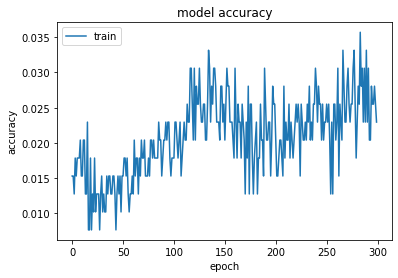

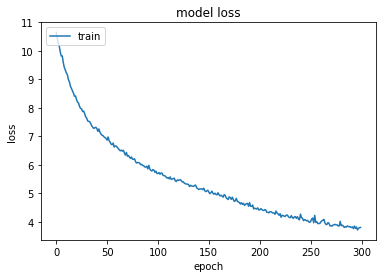

In [84]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### References:

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 <br> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html <br>
Chollet, F. 2018 *Deep Learning With Python*, Manning Publication Co., NY <br>
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/<br>
Harrison Jr, David, & Rubenfeld, Daniel, 1978, '*Hedonic Housing Prices and the Demand for Clean Air*', Journal of Environmental Economics & Management 5, 81-102 <br>
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html <br>
https://pythonfordatascience.org/independent-t-test-python/ <br>
https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f
https://statistics.laerd.com/spss-tutorials/mann-whitney-u-test-using-spss-statistics.php